# Simple Open Cluster Memberships

Using <i>Gaia</i> EDR3 data to get membership probabilities of stars in Messier 67

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

# Read Files
from astropy.io import fits

# Make pretty plots!
from utils import cmd, scatter_mag

# Convenience functions
from utils import univariate_gaussian

In [2]:
plt.rcParams['figure.figsize'] = (6,6)

In [3]:
all_data = fits.getdata("data/M67.fits.gz")

In [4]:
all_data.columns

ColDefs(
    name = 'source_id'; format = 'K'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'parallax'; format = 'D'; unit = 'mas'
    name = 'parallax_error'; format = 'E'; unit = 'mas'
    name = 'parallax_over_error'; format = 'E'
    name = 'pmra'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmra_error'; format = 'E'; unit = 'mas.yr**-1'
    name = 'pmdec'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmdec_error'; format = 'E'; unit = 'mas.yr**-1'
    name = 'phot_g_mean_mag'; format = 'E'; unit = 'mag'
    name = 'bp_rp'; format = 'E'; unit = 'mag'
    name = 'bp_g'; format = 'E'; unit = 'mag'
    name = 'g_rp'; format = 'E'; unit = 'mag'
    name = 'dr2_radial_velocity'; format = 'E'; unit = 'km.s**-1'
    name = 'dr2_radial_velocity_error'; format = 'E'; unit = 'km.s**-1'
)

In [5]:
good_stars = (~np.isnan(all_data['bp_rp'])) & (~np.isnan(all_data['phot_g_mean_mag'])) & (all_data['parallax_over_error']>10)

In [6]:
data = all_data[good_stars]

In [7]:
ra, dec, pmra, pmdec, plx = data['ra'], data['dec'], data['pmra'], data['pmdec'], data['parallax']

g, bp_rp, g_rp, bp_g = data['phot_g_mean_mag'], data['bp_rp'], data['g_rp'], data['bp_g']

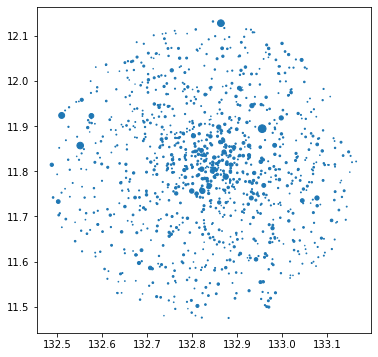

In [8]:
scatter_mag(ra, dec, g)

(-50.0, 50.0)

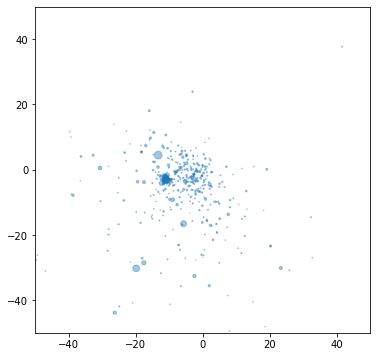

In [9]:
scatter_mag(pmra, pmdec, g, alpha=0.4)
plt.xlim(-50,50)
plt.ylim(-50,50)

(-4.0, -2.0)

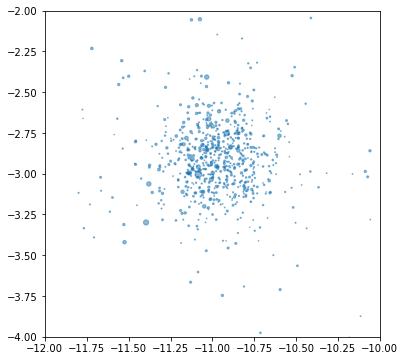

In [10]:
scatter_mag(pmra, pmdec, g, alpha=0.5)
plt.xlim(-12,-10)
plt.ylim(-4,-2)

In [11]:
mask = (pmra>-12) & (pmra<-10) & (pmdec>-4) & (pmdec<-2)

(-50.0, 50.0)

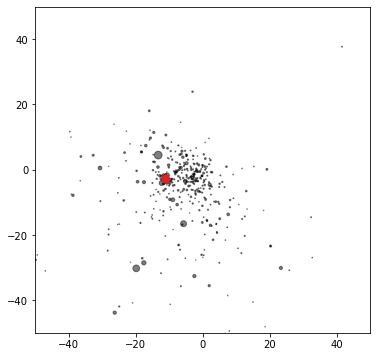

In [12]:
scatter_mag(pmra, pmdec, g, color='k', alpha=0.5)
scatter_mag(pmra[mask], pmdec[mask], g[mask], color='tab:red')
plt.xlim(-50,50)
plt.ylim(-50,50)

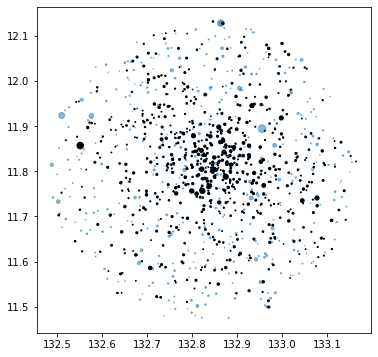

In [13]:
scatter_mag(ra, dec, g, color='tab:blue', alpha=0.5)
scatter_mag(ra[mask], dec[mask], g[mask], alpha=1, color='k')

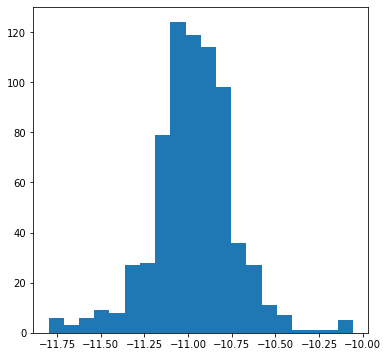

In [14]:
plt.hist(pmra[mask], bins=20);

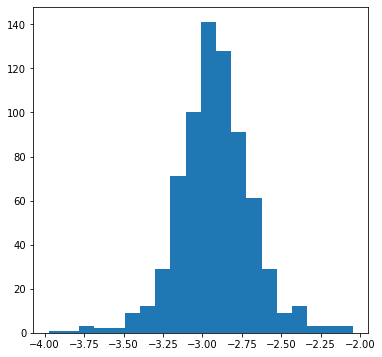

In [15]:
plt.hist(pmdec[mask], bins=20);

In [16]:
from scipy.optimize import curve_fit

In [17]:
plx_bin_edges = np.linspace(0.8, 1.6, 40)
plx_bins = 0.5*(plx_bin_edges[1:] + plx_bin_edges[:-1])

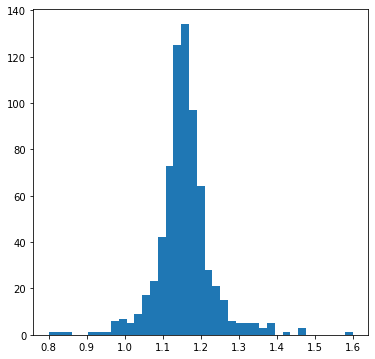

In [18]:
counts, __, __ = plt.hist(plx[mask], bins=plx_bin_edges);

In [19]:
popt_plx, perr_plx = curve_fit(univariate_gaussian, plx_bins, counts)

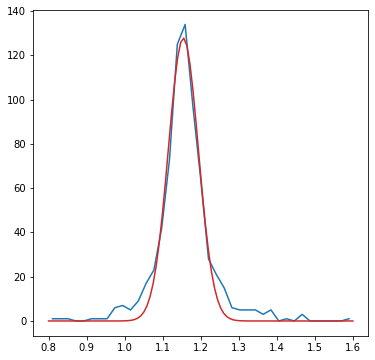

In [20]:
pbins_fine = np.linspace(0.8,1.6,100)

plt.plot(plx_bins, counts, color='tab:blue')
plt.plot(pbins_fine, univariate_gaussian(pbins_fine, *popt_plx), color='tab:red')

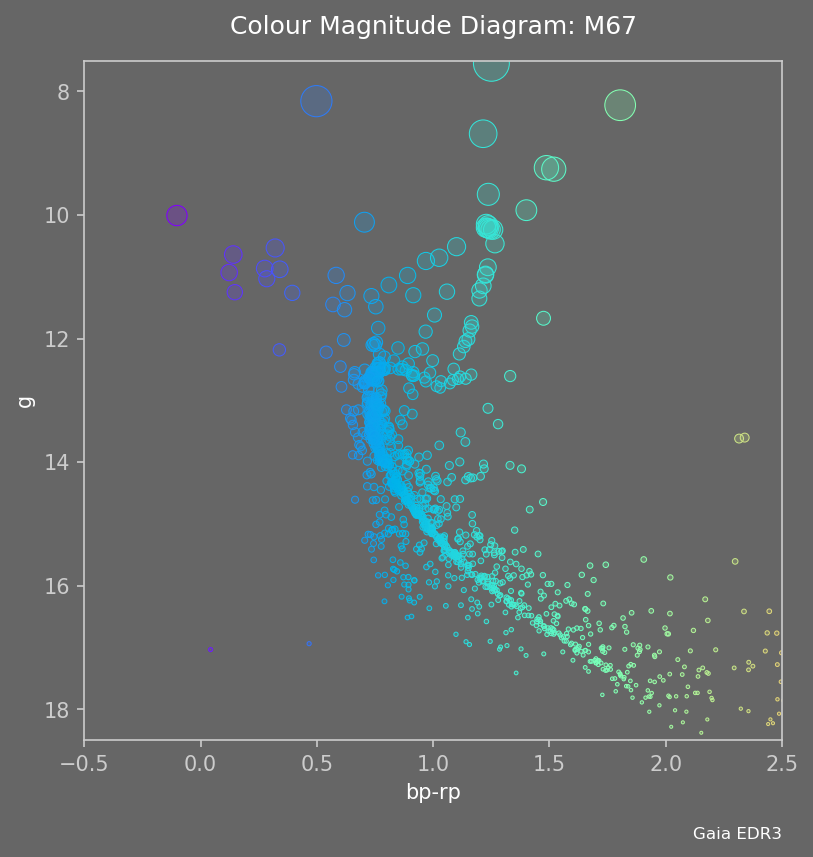

In [21]:
cmd(bp_rp, g, xlim=(-0.5, 2.5), ylim=(18.5, 7.5), col_name='bp-rp', name='M67', dpi=150)

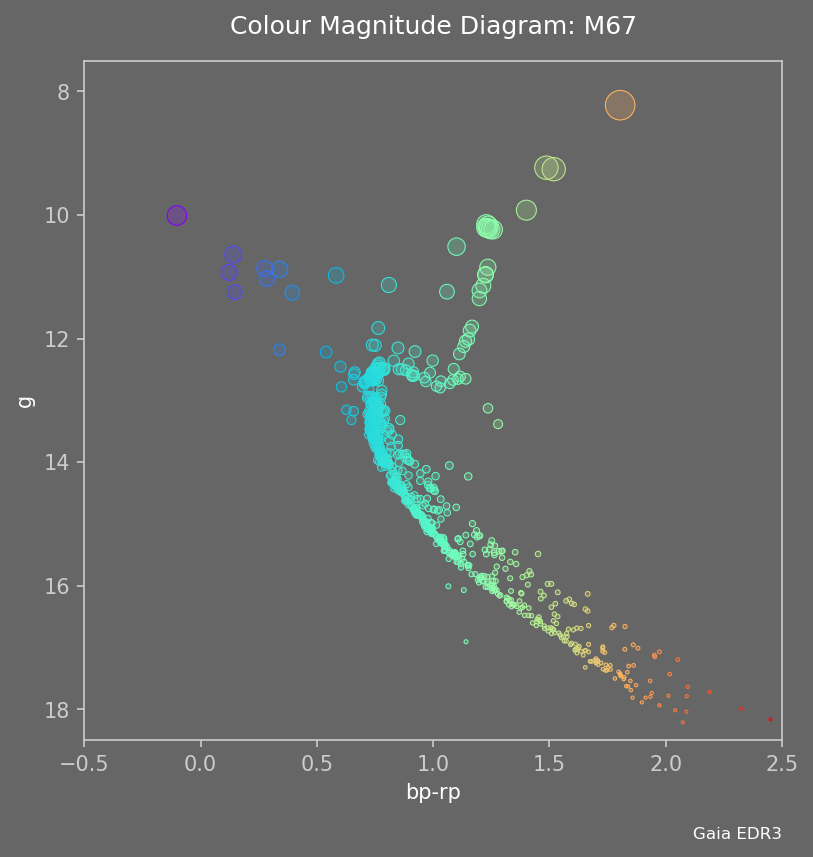

In [22]:
cmd(bp_rp[mask], g[mask], xlim=(-0.5, 2.5), ylim=(18.5, 7.5), col_name='bp-rp', name='M67', dpi=150)